In [1]:
#load the libraries
import numpy as np
import pandas as pd
np.random.seed(1)


In [3]:
import os
os.chdir("/Users/pratham/Desktop/ML:DL Practice")
os.getcwd()

'/Users/pratham/Desktop/ML:DL Practice'

In [4]:
train = pd.read_csv("Digit Recognizer/train.csv")
test = pd.read_csv("Digit Recognizer/test.csv")

In [7]:
print(train.shape)
print(test.shape)
train.head(n=6)

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


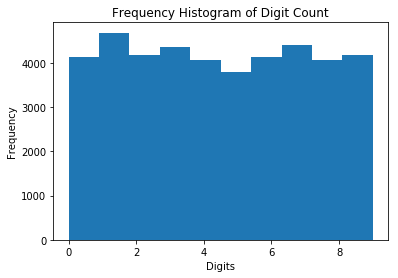

In [20]:
import matplotlib.pyplot as plt
plt.hist(train["label"])
plt.title("Frequency Histogram of Digit Count")
plt.xlabel("Digits")
plt.ylabel("Frequency")

plt.show()

PCA - Dimensionality Reduction

In [13]:
label_train = train["label"]
train = train.drop('label',axis = 1)

In [14]:
#Normalize data
train = train/255
test = test/255
train['label']  = label_train

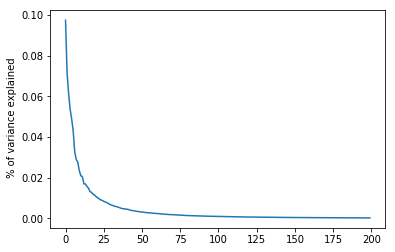

In [21]:
from sklearn import decomposition
from sklearn import datasets

## PCA

pca = decomposition.PCA(n_components = 200)
pca.fit(train.drop('label',axis = 1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel(" % of variance explained")

plt.show()

#plot reaches asymptote at around 50, which is optimal number of PCs to use

pca = decomposition.PCA(n_components = 50)
pca.fit(train.drop('label',axis =1))
PCtrain = pd.DataFrame(pca.transform(train.drop('label',axis =1)))
PCtrain['label'] = train['label']

#decompose test data
PCtest = pd.DataFrame(pca.transform(test))

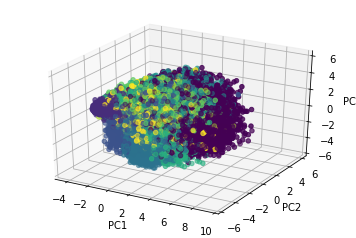

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

x =PCtrain[0]
y =PCtrain[1]
z =PCtrain[2]

colors = [int(i % 9) for i in PCtrain['label']]
ax.scatter(x, y, z, c=colors, marker='o', label=colors)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

# Neural Network

In [23]:
from sklearn.neural_network import MLPClassifier
y = PCtrain['label'][0:20000]
X = PCtrain.drop('label',axis =1)[0:20000]
clf = MLPClassifier(solver = 'lbfgs',alpha = 1e-5,hidden_layer_sizes = (3500,), random_state = 1)
clf.fit(X,y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [24]:
from sklearn import metrics
#accuracy and confusion matrix
predicted = clf.predict(PCtrain.drop('label',axis = 1)[20001:42000])
expected = PCtrain['label'][20001:42000]

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False):
             precision    recall  f1-score   support

          0       0.98      0.99      0.98      2200
          1       0.99      0.99      0.99      2418
          2       0.97      0.97      0.97      2167
          3       0.97      0.95      0.96      2270
          4       0.97      0.98      0.98      2101
          5       0.96      0.97      0.97      2001
          6       0.98      0.98      0.98      2155
          7       0.97      0.98      0.97      2331
          8       0.96      0.96      0.96      2148

In [ ]:
output = pd.DataFrame(clf.predict(PCtest), columns =['Label'])
output.reset_index(inplace=True)
output.rename(columns={'index': 'ImageId'}, inplace=True)
output['ImageId']=output['ImageId']+1
output.to_csv('output.csv', index=False)